In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import normalize
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2

In [2]:
data_path = '/kaggle/input/indian-food-classification/Food Classification'

In [3]:
varieties = []
for var in os.listdir(data_path):
    varieties.append(var)

# **Reading Image**

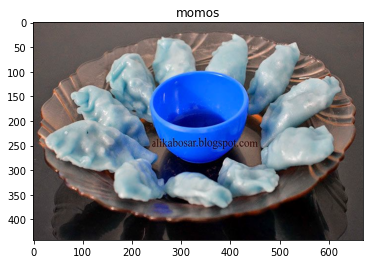

In [4]:
for var in varieties:
    var_path = os.path.join(data_path, var)
    for img_path in os.listdir(var_path):
        img = cv2.imread(os.path.join(var_path, img_path))
        plt.imshow(img)
        plt.title(var)
        plt.plot
        break
    break

# **Creating Dataset**

In [5]:
img_size = (150, 150)
food_data = []
for var in varieties:
    var_path = os.path.join(data_path, var)
    label = varieties.index(var)
    for img_path in os.listdir(var_path):
        img = cv2.imread(os.path.join(var_path, img_path))
        img_resize = cv2.resize(img, img_size)
        food_data.append([img_resize, label])

In [6]:
# Shuffling data
random.shuffle(food_data)

In [7]:
# Creating features and labels
X = []
y = []
for img, label in food_data:
    X.append(img)
    y.append(label)

# **Normalizing**

In [8]:
X = np.array(X).reshape(-1, 150, 150, 3)
y = np.array(y)

In [9]:
y = to_categorical(y)

In [10]:
X = keras.utils.normalize(X, axis=1, order=2)

# **Serializing**

In [11]:
pickle_out = open('Pickle_X', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

In [12]:
pickle_out = open('Pickle_y', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# **Deserializing**

In [13]:
pickle_in = open('/kaggle/working/Pickle_X', 'rb')
X = pickle.load(pickle_in)
pickle_in.close()

In [14]:
pickle_in = open('/kaggle/working/Pickle_y', 'rb')
y = pickle.load(pickle_in)
pickle_in.close()

# **Splitting data**

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [16]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.4)

# **Developing Model**

In [17]:
early_stopping = callbacks.EarlyStopping(
    patience = 15,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.001,
) 

In [18]:
predefined_base = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(150, 150, 3),
    pooling='avg',
)

9420800/9406464 [==============================] - 0s 0us/step


In [19]:
model = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomRotation(factor=0.10),
    
    predefined_base,
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(units=128, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=128, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=128, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=256, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=256, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(units=20, activation='softmax'),
])

In [20]:
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 100,
    epochs = 400,
    callbacks = [ early_stopping],
)

Epoch 1/400
51/51 [==============================] - 30s 282ms/step - loss: 3.1407 - accuracy: 0.1613 - val_loss: 6.0658 - val_accuracy: 0.0571
Epoch 2/400
51/51 [==============================] - 12s 242ms/step - loss: 2.0655 - accuracy: 0.3949 - val_loss: 6.3398 - val_accuracy: 0.0651
Epoch 3/400
51/51 [==============================] - 12s 243ms/step - loss: 1.5650 - accuracy: 0.5441 - val_loss: 6.4979 - val_accuracy: 0.1315
Epoch 4/400
51/51 [==============================] - 12s 242ms/step - loss: 1.2267 - accuracy: 0.6501 - val_loss: 7.6526 - val_accuracy: 0.1594
Epoch 5/400
51/51 [==============================] - 12s 242ms/step - loss: 1.0760 - accuracy: 0.7028 - val_loss: 9.8508 - val_accuracy: 0.0863
Epoch 6/400
51/51 [==============================] - 12s 243ms/step - loss: 0.9250 - accuracy: 0.7506 - val_loss: 11.6245 - val_accuracy: 0.0571
Epoch 7/400
51/51 [==============================] - 12s 244ms/step - loss: 0.7976 - accuracy: 0.7877 - val_loss: 10.6865 - val_accurac

# **Evaluating model**

In [23]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:>

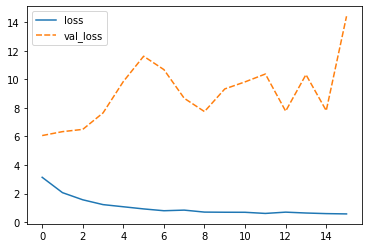

In [24]:
sns.lineplot(data = history_df.loc[:, ['loss', 'val_loss']])

<AxesSubplot:>

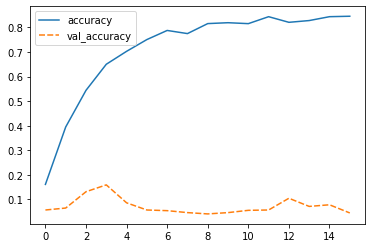

In [25]:
sns.lineplot(data = history_df.loc[:, ['accuracy', 'val_accuracy']])

In [26]:
eval = model.evaluate(X_test, y_test)
print('Accuracy of model is: {:.3f}'.format(eval[1]*100))

16/16 [==============================] - 1s 24ms/step - loss: 5.5737 - accuracy: 0.0857
Accuracy of model is: 8.566


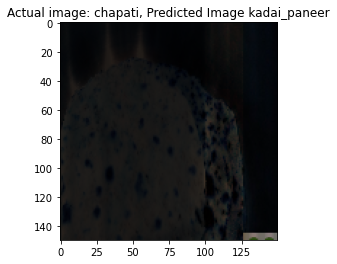

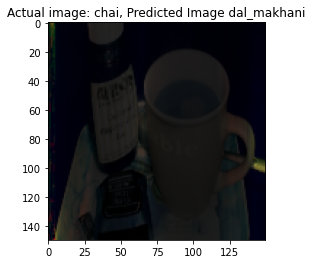

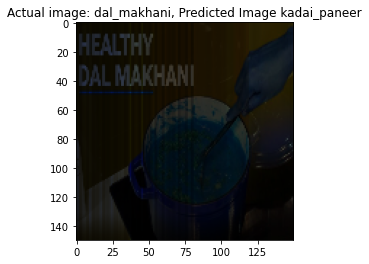

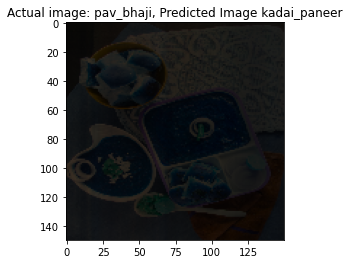

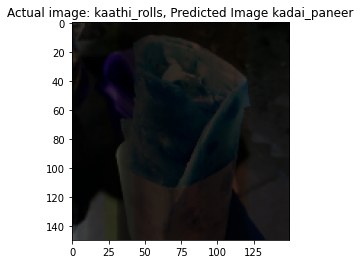

In [27]:
pred = model.predict(X_test)
for i in range(5):
    plt.imshow(X_test[i])
    plt.title('Actual image: {}, Predicted Image {}'.format(varieties[np.argmax(y_test[i])], varieties[np.argmax(pred[i])]))
    plt.show()